## What is Support Vector Machines (SVM)

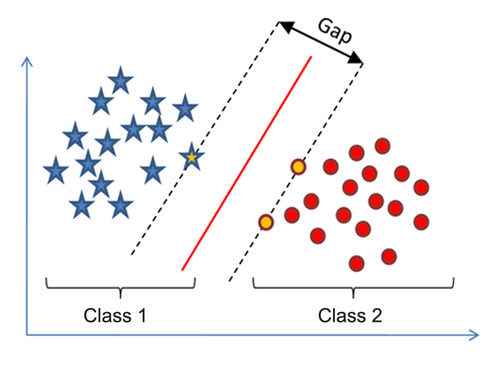

A SVM classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

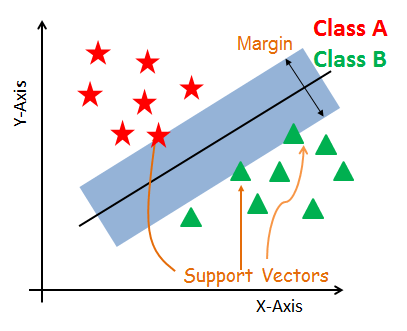

- Support Vectors
- Hyperplane
- Margin

### Support Vectors

Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

### Hyperplane 

A hyperplane is a decision plane which separates between a set of objects having different class memberships.

### Margin 

A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

## How SVM works?

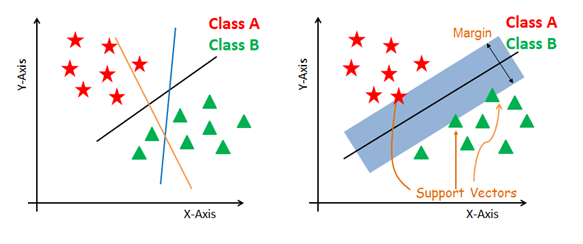

- Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

- Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.

### Separation Planes
- Linear
- Non-Linear

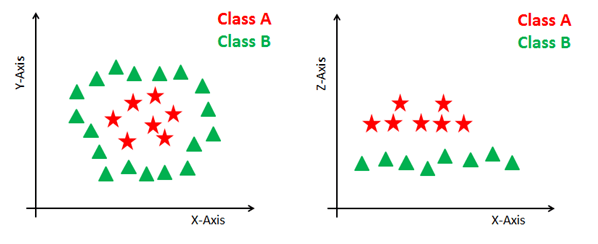

#### Dealing with non-linear and inseparable planes

SVM uses a kernel trick to transform the input space to a higher dimensional space

## SVM Kernels

- Linear
- Polynomial
- Radial Basis Function

The SVM algorithm is implemented in practice using a kernel. Kernel helps you to build a more accurate classifier.

- A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

- A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space

- The Radial basis function (RBF) kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.

## Let's Build Model in sklearn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
cancer = datasets.load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
cancer.feature_names.shape

(30,)

In [9]:
X = cancer.data
y = cancer.target

In [10]:
X.shape, y.shape

((569, 30), (569,))

In [11]:
X[0:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [13]:
# 0: malignant, 1: benign
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Standardization 

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Split the data and build the model 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1, stratify = y)

In [22]:
from sklearn import svm

Accuracy:  0.9912280701754386
Precision:  0.9863013698630136
Recall:  1.0
Confusion Matrix


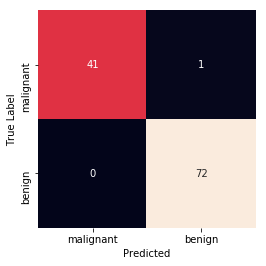

In [25]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

print('Precision: ', metrics.precision_score(y_test, y_predict))
print('Recall: ', metrics.recall_score(y_test, y_predict))

print('Confusion Matrix')

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels=cancer.target_names,
           yticklabels=cancer.target_names)

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

In [27]:
element, count = np.unique(y_test, return_counts=True)
element, count

(array([0, 1]), array([42, 72], dtype=int64))

In [19]:
# without scaling of input feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9649122807017544


## Polynomial Kernel

Accuracy:  0.9473684210526315
Precision:  0.9459459459459459
Recall:  0.9722222222222222
Confusion Matrix


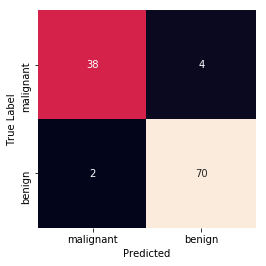

In [31]:
clf = svm.SVC(kernel='poly', degree = 5, gamma = 100)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

print('Precision: ', metrics.precision_score(y_test, y_predict))
print('Recall: ', metrics.recall_score(y_test, y_predict))

print('Confusion Matrix')

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels=cancer.target_names,
           yticklabels=cancer.target_names)

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

## Sigmoid Kernel 

Accuracy:  0.8947368421052632
Precision:  0.9411764705882353
Recall:  0.8888888888888888
Confusion Matrix


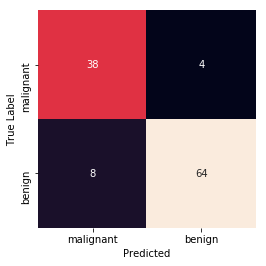

In [38]:
clf = svm.SVC(kernel='sigmoid', gamma = 200, C = 0.20)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

print('Precision: ', metrics.precision_score(y_test, y_predict))
print('Recall: ', metrics.recall_score(y_test, y_predict))

print('Confusion Matrix')

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels=cancer.target_names,
           yticklabels=cancer.target_names)

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()